# Explaining Runge Kutta divergence

c:\users\tomsc\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:57: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


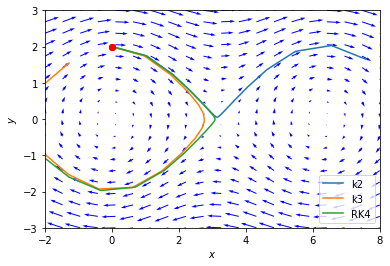

<Figure size 432x288 with 0 Axes>

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


def integrate(y0, times, f, method):
    y = y0
    states = [y]
    for i in range(len(times) - 1):
        y = method(f, times[i], times[i+1]-times[i], y)
        states.append(y)
    return np.array(states)

def k2(f, t, dt, y):
    k1 = f(t, y)
    k2 = f(t + dt / 2,  y + dt * k1 / 2)
    return y + dt * k2

def k3(f, t, dt, y):
    k1 = f(t, y)
    k2 = f(t + dt / 2,  y + dt * k1 / 2)
    k3 = f(t + dt / 2,  y + dt * k2 / 2)
    return y + dt * k3

def RK4(f, t, dt, y):
    k1 = f(t, y)
    k2 = f(t + dt / 2,  y + dt * k1 / 2)
    k3 = f(t + dt / 2,  y + dt * k2 / 2)
    k4 = f(t + dt,      y + dt * k3)
    return y + dt * (k1 + 2 * k2 + 2 * k3 + k4) / 6

def f(t, s):
    x, y = s
    return np.array([y, - np.sin(x)])

x = np.linspace(-2.0, 8.0, 20)
y = np.linspace(-3.0, 3.0, 20)

X, Y = np.meshgrid(x, y)

t = 0

u, v = np.zeros(X.shape), np.zeros(Y.shape)

NI, NJ = Y.shape

for i in range(NI):
    for j in range(NJ):
        x = X[i, j]
        y = Y[i, j]
        u[i,j], v[i,j] = f(-1, [x, y])

Q = plt.quiver(X, Y, u, v, color='b')

t, dt = 11.0, 0.5
for method in [k2, k3, RK4]:
    tspan = np.linspace(0, t, t / dt)
    y0 = [0.0, 2.0]
    ys = integrate(y0, tspan, f, method)

    plt.plot(ys[:,0], ys[:,1], label=method.__name__) # path
    plt.plot([ys[0,0]], [ys[0,1]], 'ro') # start

plt.legend(loc='lower right')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim([-2., 8.])
plt.ylim([-3., 3.])
plt.show()
plt.savefig('figs/k2vsk3.png')